In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/demand-forecasting-kernels-only/sample_submission.csv
/kaggle/input/demand-forecasting-kernels-only/train.csv
/kaggle/input/demand-forecasting-kernels-only/test.csv


In [2]:
#training
train = pd.read_csv("/kaggle/input/demand-forecasting-kernels-only/train.csv")
#shape
train.shape

(913000, 4)

In [3]:
#show data
train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
#testing
testing = pd.read_csv("/kaggle/input/demand-forecasting-kernels-only/test.csv")
#show data
testing

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [5]:
#shape of testing
testing.shape

(45000, 4)

In [6]:
#Importing the testing data
testing.info()
testing.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


id       0
date     0
store    0
item     0
dtype: int64

In [7]:
#Importing training data
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


date     0
store    0
item     0
sales    0
dtype: int64

In [8]:
#print out
print(train.isna().sum())
print(train.shape)
print("")
print(train.isna().sum())
print(train.shape)

date     0
store    0
item     0
sales    0
dtype: int64
(913000, 4)

date     0
store    0
item     0
sales    0
dtype: int64
(913000, 4)


In [9]:
train.nunique()

date     1826
store      10
item       50
sales     213
dtype: int64

In [10]:
train.iloc[:, 1:].describe().T.sort_values(by='std', ascending = False)\
                    .style.background_gradient(cmap = 'GnBu')\
                    .bar(subset=['max'], color ='#BB0000')\
                    .bar(subset=['mean'], color = 'purple')

,count,mean,std,min,25%,50%,75%,max
sales,913000.000000,52.250287,28.801144,0.000000,30.000000,47.000000,70.000000,231.000000
item,913000.000000,25.500000,14.430878,1.000000,13.000000,25.500000,38.000000,50.000000
store,913000.000000,5.500000,2.872283,1.000000,3.000000,5.500000,8.000000,10.000000


In [11]:
#Printing out number of duplicates in the training set
print(f"Number of duplicates in the train set:{train.duplicated().sum()},{train.duplicated().sum()/train.shape[0]*100}")

Number of duplicates in the train set:0,0.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


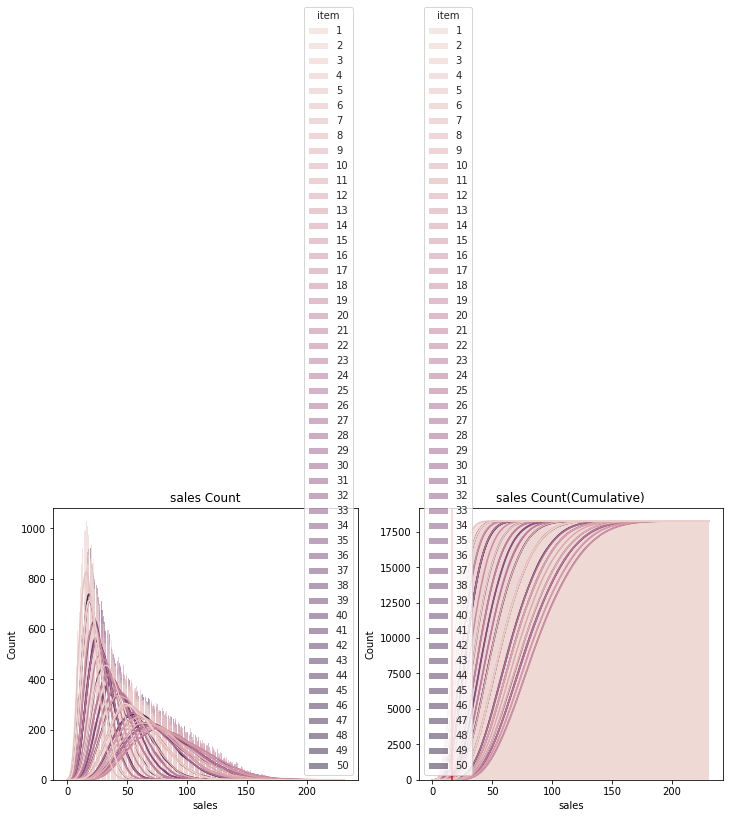

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12, 5))
sns.set_style("whitegrid")

sns.histplot(data=train, x="sales", ax=axes[0], hue="item", kde=True)
sns.histplot(data=train, x="sales", ax=axes[1], hue="item", kde=True, cumulative = True)

axes[1].axvline(x=16, color="r", linestyle = "-")
axes[0].set_title("sales Count")
axes[1].set_title('sales Count(Cumulative)')

plt.tight_layout()

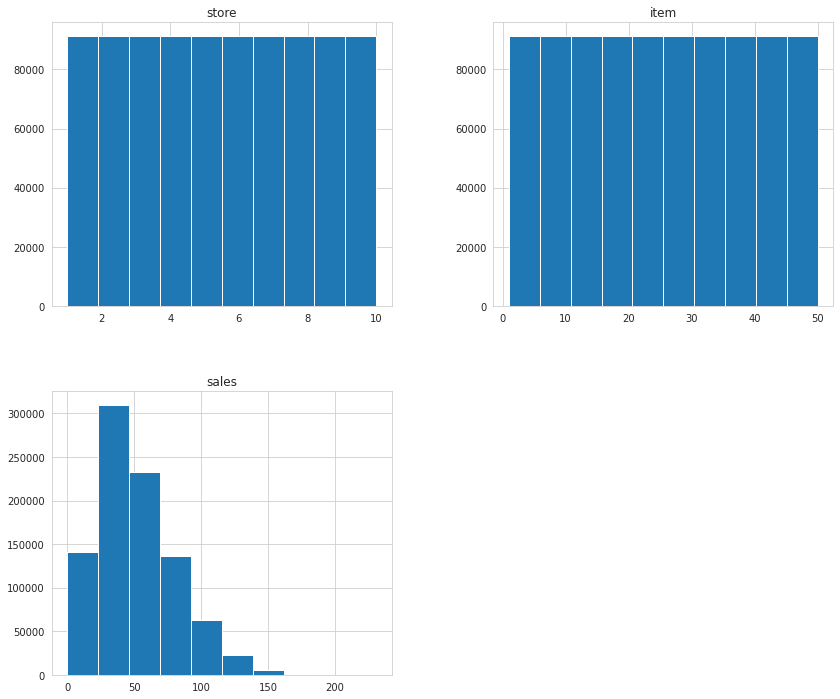

In [13]:
#sales data Visualisation
#histogram
train.hist(figsize=(14, 12))
plt.show()

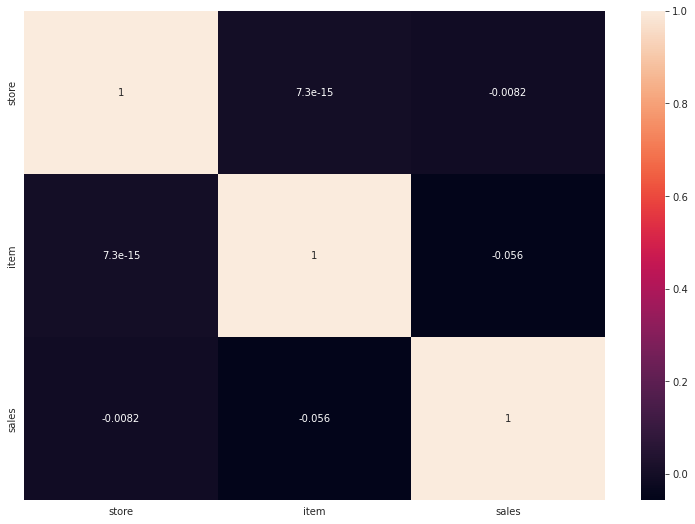

In [14]:
#Correlations
plt.figure(figsize=(13, 9))
corr = train.corr()
sns.heatmap(corr, annot = True)
plt.show()

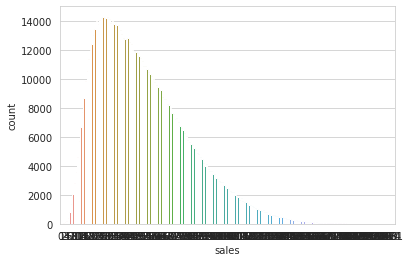

In [15]:
#count plot of target
sns.countplot(x='sales', data= train)
plt.show()

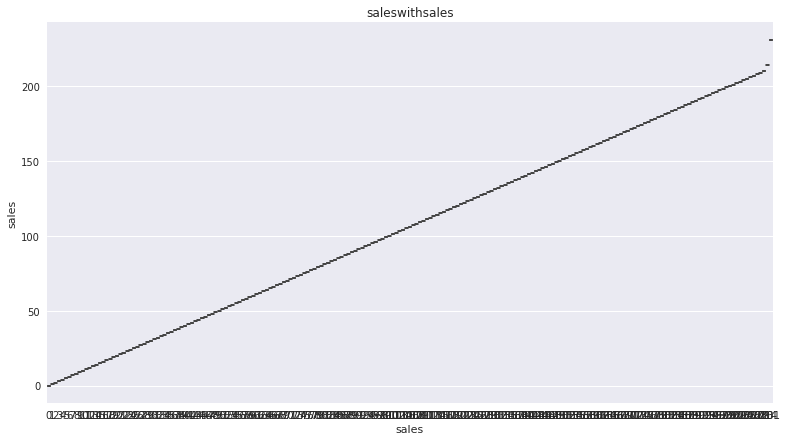

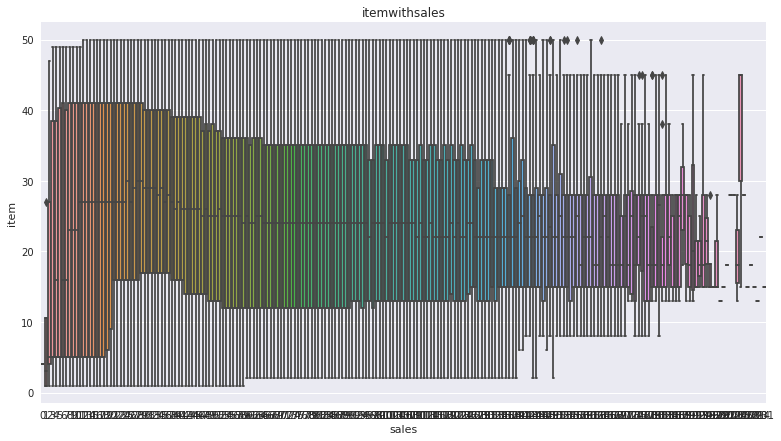

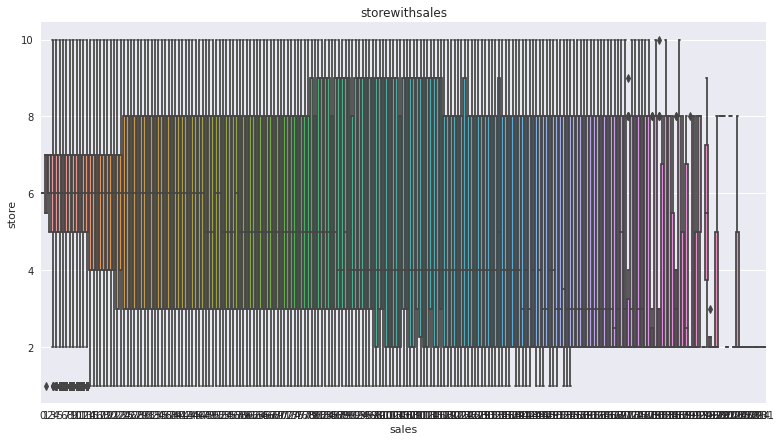

In [16]:
# plot graph of saleswithsales, itemwithsales and storewithitem
plt.style.use('seaborn')
col = ['sales', 'item', 'store']
for i in col:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + "with" + str('sales'))
    sns.boxplot(x=train.sales, y=train[i])
    plt.show()

<AxesSubplot:xlabel='sales', ylabel='sales'>

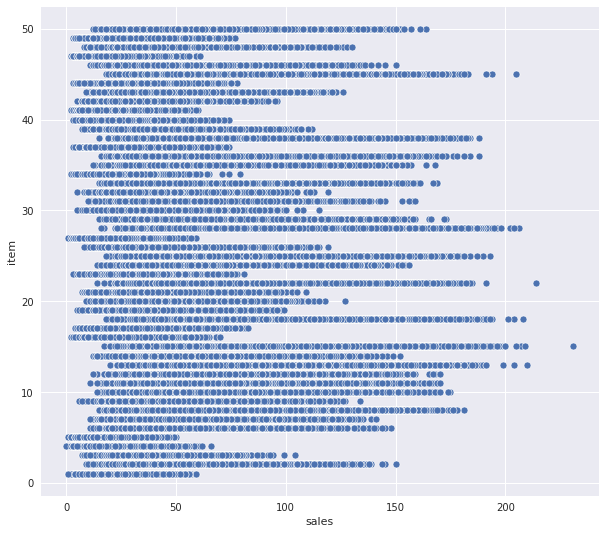

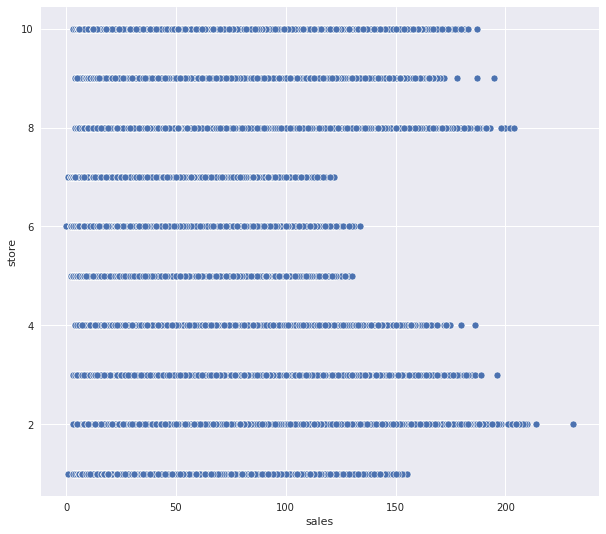

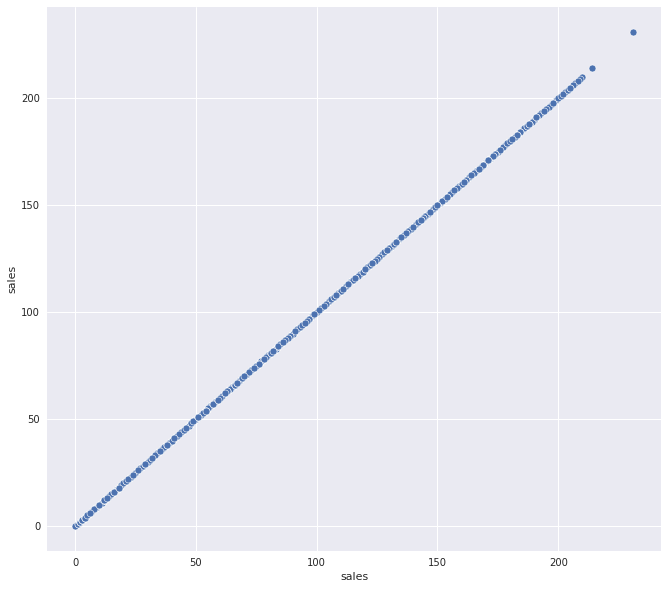

In [17]:
#scatterplot sales vs item
plt.figure(figsize=(10, 9))
sns.scatterplot(x = 'sales', y= 'item', data = train)

#store vs sales
plt.figure(figsize=(10, 9))
sns.scatterplot(x = 'sales', y = "store" , data =train )

#salewithsale
plt.figure(figsize=(11, 10))
sns.scatterplot(x = 'sales', y='sales', data = train)

In [18]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


2022-08-07 18:48:50.895830: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


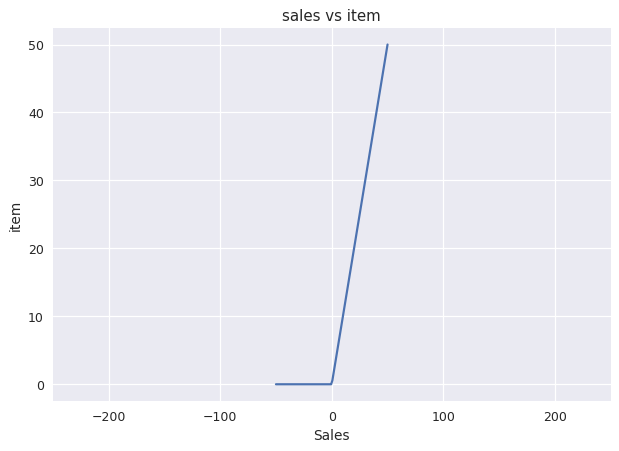

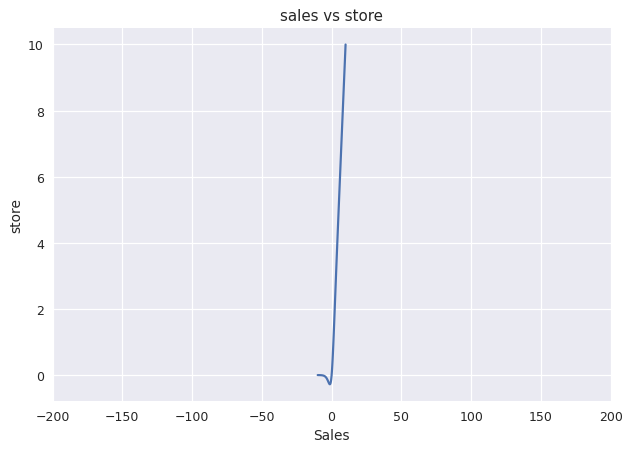

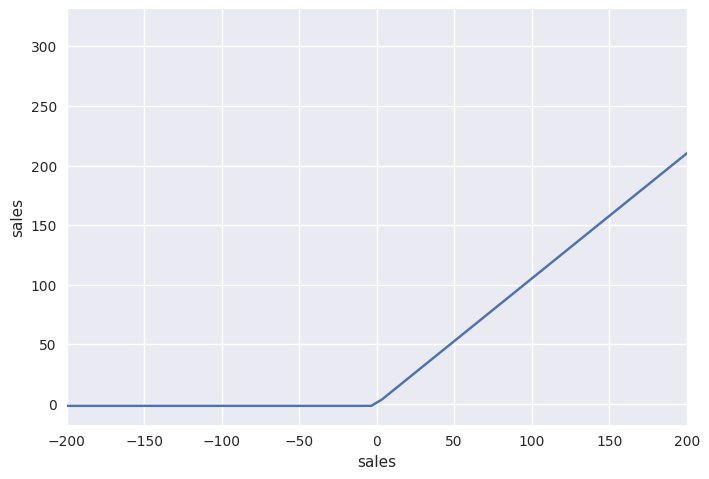

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

#salesvsitem
activation_layer = layers.Activation('relu')

x = tf.linspace(-50.0, 50.0, 90)
y = activation_layer(x)

plt.figure(dpi=90)
plt.plot(x, y)
plt.xlim(-250, 250)
plt.xlabel("Sales")
plt.ylabel("item")
plt.title("sales vs item")
plt.show()

#salesvsstore
activation_layer=layers.Activation('swish')

x = tf.linspace(-10.0, 10.0, 90)
y = activation_layer(x)

plt.figure(dpi= 90)
plt.plot(x, y)
plt.xlim(-200, 200)
plt.xlabel('Sales')
plt.ylabel('store')
plt.title('sales vs store')
plt.show()

#salesvssales
activation_layer=layers.Activation('selu')

x = tf.linspace(-300.0, 300.0, 90)
y = activation_layer(x)

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-200, 200)
plt.xlabel('sales')
plt.ylabel('sales')
plt.show()

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

input_shape = (11,)
model = keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=input_shape),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1),
])